#Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt

UCI Machine Learning Repository

Source:

The dataset was created by Max Little of the University of Oxford, in collaboration with the National Centre for Voice and Speech, Denver, Colorado, who recorded the speech signals. The original study published the feature extraction methods for general voice disorders.


Data Set Information:

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. 

#Data cleaning and Preprocessing

In [ ]:
par = pd.read_csv("parkinsons.csv")
par.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335



* MDVP:           Fo (Hz)	Average vocal fundamental frequency

* MDVP:           Fhi (Hz)	Maximum vocal fundamental frequency

* MDVP:           Flo (Hz)	Minimum vocal fundamental frequency
* MDVP:           Jitter (%)	parameter of frequency variation from * cycle to cycle- Five measures of variation in                                   fundamental frequency
* MDVP:           Jitter (Abs)
* MDVP:           RAP
* MDVP:           PPQ
* Jitter:         DDP
* MDVP:           shimmer relates to the amplitude variation of the sound wave- Shimmer	Six measures of variation in                   amplitude
* MDVP:           Shimmer (dB)
* Shimmer:        APQ3
* Shimmer:        APQ5
* MDVP:           APQ
* Shimmer:        DDA
* Two measures of ratio of noise to tonal components in the voice

> * NHR
* HNR

* Two nonlinear dynamical complexity measures

> * RPDE        	
* D2

* DFA:	            Signal fractal scaling exponent
* Three nonlinear measures of fundamental frequency variation

> * Spread1        	
* Spread2
* PPE

* Status: Health status of the subject: one - Parkinson’s; zero - healthy

In [ ]:
par.shape

(195, 24)

In [ ]:
n_patients = par.shape[0]   ##number of patients
n_features = par.shape[1]-1 ##number of features

In [ ]:
n_parkinsons = par[par['status'] == 1].shape[0] ##persons with parkinson 
n_healthy = par[par['status'] == 0].shape[0]

In [ ]:
print("total number of patients:", n_patients)
print("number of features:", n_features)
print("number of patients with parkinson:", n_parkinsons)
print("number of patients without parkinsons:", n_healthy)


total number of patients: 195
number of features: 23
number of patients with parkinson: 147
number of patients without parkinsons: 48


In [ ]:
X = list(par.columns[1:17]) + list(par.columns[18:])
Y  = par.columns[17]

In [ ]:
par.columns[0]

'name'

In [ ]:
Xf = par[X]
Yf = par[Y]

In [ ]:
Xf

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,...,0.02745,0.07008,0.02764,19.517,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,...,0.01879,0.04812,0.01810,19.147,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,...,0.01667,0.03804,0.10715,17.883,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,...,0.01588,0.03794,0.07223,19.020,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [ ]:
from sklearn.utils import class_weight

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(Xf, Yf, test_size=0.3, random_state=0)

In [ ]:
x_train.shape

(136, 22)

In [ ]:
y_test = np.array(y_test)
y_train = np.array(y_train)


In [ ]:
y_train

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0])

In [ ]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes = np.unique(y_train),
                                                 y=y_train)

In [ ]:
class_weights

array([1.94285714, 0.67326733])

In [ ]:
class_weight = {0: 3.,
                1: 1.}

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
x_train_normal = scaler.transform(x_train)
x_test_normal=scaler.transform(x_test)


In [ ]:
x_train_normal

array([[ 1.20277786,  3.55007322,  1.46378495, ...,  0.37523479,
         1.38253798,  0.70950026],
       [-0.08490869, -0.40139205,  0.69127853, ..., -0.57555776,
        -0.31740397, -0.64646829],
       [-1.11208247, -0.68412437, -0.30308418, ..., -0.30690231,
        -1.04720163,  1.20993771],
       ...,
       [ 0.41632981,  2.41567671, -0.86941153, ...,  1.69605993,
         1.55536714,  0.84509927],
       [ 2.43201619,  0.56163635,  1.59509347, ..., -0.36324299,
        -0.93743211, -1.26715615],
       [-1.06441596, -0.89097029, -0.36804959, ..., -0.46543789,
        -1.3048217 , -0.32328725]])

In [ ]:
x_test_normal

array([[-1.35887755, -1.00188268, -0.66104715, ..., -1.83845482,
        -0.87167251, -0.28969673],
       [-0.41832753, -0.43650645,  0.37155845, ..., -0.94120095,
        -0.90410363, -0.70662576],
       [ 1.19374787,  0.07167505,  1.93460009, ..., -0.63181426,
        -2.21110636, -1.59259592],
       ...,
       [ 0.80957851,  0.07518158,  0.80306179, ...,  1.31294332,
         1.51043619,  1.04630896],
       [ 0.3139159 ,  0.01670996, -0.89316488, ...,  1.90191687,
         2.45455716,  1.05131043],
       [ 0.06226042, -0.14643695,  0.64581462, ...,  1.31198126,
         1.24165312,  1.26813762]])

In [ ]:
from keras.layers import Input,Dense
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam 
import tensorflow as tf

# Calculate accuracy and metrics including precision and recall.
Precision decreases as the number of healthy patients wrongly diagnosed with Parkinson's increases.
Recall decreases as the number of Parkinson's patients wrongly diagnosed as healthy increases.

In [ ]:
def accuracy(prediction,actual):
    correct = 0
    not_correct = 0
    for i in range(len(prediction)):
        if prediction[i] == actual[i]:
            correct+=1
        else:
            not_correct+=1
    return (correct*100)/(correct+not_correct)


def metrics(prediction,actual):
    tp = 0
    tn = 0
    fp = 0
    fn = 0
    for i in range(len(prediction)):
        if prediction[i] == actual[i] and actual[i]==1:
            tp+=1
        if prediction[i] == actual[i] and actual[i]==0:
            tn+=1
        if prediction[i] != actual[i] and actual[i]==0:
            fp+=1
        if prediction[i] != actual[i] and actual[i]==1:
            fn+=1
    metrics = {'Precision':(tp/(tp+fp+tn+fn)),'Recall':(tp/(tp+fn))}
    return (metrics)

In [ ]:
def build_network(input_features):
    # first we specify an input layer, with a shape == features
    inputs = Input(shape=input_features, name="input")
    x = Dense(128, activation='relu', name="hidden1")(inputs)
    x = Dense(64, activation='relu', name="hidden2")(x)
    x = Dense(32, activation='relu', name="hidden4")(x)
    x = Dense(16, activation='relu', name="hidden5")(x)
    prediction = Dense(1, activation='sigmoid', name="final")(x)
    model = Model(inputs=inputs, outputs=prediction)
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy",tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])
    return model

#Random Forest Classifier

In [ ]:
clf=RandomForestClassifier()
clf.fit(x_train_normal, y_train)
preds=clf.predict(x_test_normal)
print('accuracy:',accuracy(y_test.tolist(), preds.tolist()), '%')
print(metrics(y_test.tolist(), preds.tolist()))

accuracy: 94.91525423728814 %
{'Precision': 0.7457627118644068, 'Recall': 0.9777777777777777}


#SVM

In [ ]:
clf=SVC()
clf.fit(x_train_normal, y_train)
preds=clf.predict(x_test_normal)
print('accuracy:',accuracy(y_test.tolist(), preds.tolist()), '%')
print(metrics(y_test.tolist(), preds.tolist()))

accuracy: 93.22033898305085 %
{'Precision': 0.7796610169491526, 'Recall': 0.92}


In [ ]:
input_features = x_train_normal.shape[1]

In [ ]:
input_features

22

In [ ]:
model1 = build_network(input_features=input_features)

In [ ]:
model1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 22)]              0         
                                                                 
 hidden1 (Dense)             (None, 128)               2944      
                                                                 
 hidden2 (Dense)             (None, 64)                8256      
                                                                 
 hidden4 (Dense)             (None, 32)                2080      
                                                                 
 hidden5 (Dense)             (None, 16)                528       
                                                                 
 final (Dense)               (None, 1)                 17        
                                                                 
Total params: 13,825
Trainable params: 13,825
Non-trainable p

# CNN MODEL 

In [ ]:
history1 =model1.fit(x_train_normal, y_train, batch_size=16, epochs=25, verbose=1, validation_data=(x_test_normal, y_test),class_weight=class_weight)


Epoch 1/25
9/9 [==============================] - 2s 77ms/step - loss: 0.9405 - accuracy: 0.7941 - precision: 0.8349 - recall: 0.9010 - val_loss: 0.5293 - val_accuracy: 0.8136 - val_precision: 0.9070 - val_recall: 0.8478
Epoch 2/25
9/9 [==============================] - 0s 7ms/step - loss: 0.7676 - accuracy: 0.7647 - precision: 0.9481 - recall: 0.7228 - val_loss: 0.4656 - val_accuracy: 0.8305 - val_precision: 1.0000 - val_recall: 0.7826
Epoch 3/25
9/9 [==============================] - 0s 6ms/step - loss: 0.6321 - accuracy: 0.7794 - precision: 0.9863 - recall: 0.7129 - val_loss: 0.3789 - val_accuracy: 0.8305 - val_precision: 0.9737 - val_recall: 0.8043
Epoch 4/25
9/9 [==============================] - 0s 10ms/step - loss: 0.5249 - accuracy: 0.8162 - precision: 0.9750 - recall: 0.7723 - val_loss: 0.3039 - val_accuracy: 0.8644 - val_precision: 0.9750 - val_recall: 0.8478
Epoch 5/25
9/9 [==============================] - 0s 6ms/step - loss: 0.4341 - accuracy: 0.8897 - precision: 0.9778 - 

In [ ]:
from matplotlib import pyplot as plt
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()


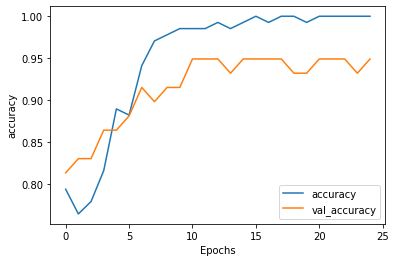

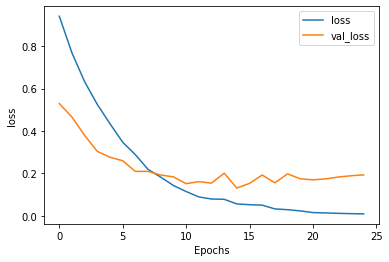

In [ ]:
plot_graphs(history1, "accuracy")
plot_graphs(history1, "loss")

In [ ]:
train_accuracy=model1.evaluate(x_train_normal,y_train)

5/5 [==============================] - 0s 3ms/step - loss: 0.0066 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000


In [ ]:
test_accuracy=model1.evaluate(x_test_normal,y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.1935 - accuracy: 0.9492 - precision: 0.9778 - recall: 0.9565
